<a href="https://colab.research.google.com/github/Wazhee/Multiple-Sclerosis-Lesion-Tracking-with-Deep-Learning/blob/main/Notebooks/main_deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import pandas as pd
from sklearn.manifold import Isomap
from PIL import Image
import torch

from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [ ]:
sub_id = 31604
path='/content/MyDrive/MyDrive/BravermanLab/MS_Project/stripped/'+str(sub_id)+'/anat/'

loc1='pdw_2d_ax.nii.gz'#'dual_2d_ax.nii.gz'
dualx = nib.load(path+loc1)
dual = dualx.get_fdata().T

loc1='t2w_2d_ax.nii.gz'#'dual_2d_ax_e1.nii.gz'
dualx = nib.load(path+loc1)
duale = dualx.get_fdata().T

loc2='flair_2d_ax.nii.gz'
flairx = nib.load(path+loc2)
flair = flairx.get_fdata().T

loc3='t1w_3d_ax.nii.gz'#'t1w_2d_ax.nii.gz'
t1x = nib.load(path+loc3)
t1 = t1x.get_fdata().T

loc4='t1w_2d_ax_pre.nii.gz'
prex = nib.load(path+loc4)
pre = prex.get_fdata().T

loc5='t1w_2d_ax_post.nii.gz'
postx = nib.load(path+loc5)
post = postx.get_fdata().T

print(dual.shape,flair.shape,t1.shape,pre.shape,post.shape)

allx=[];
allx.append(dual)
allx.append(duale)
allx.append(flair)
#allx.append(t1)
allx.append(pre)
allx.append(post)
#all_og=np.array(allx)
#all_og.shape
data_og=allx
len(data_og)


(44, 512, 512) (44, 256, 256) (120, 256, 256) (44, 256, 256) (44, 256, 256)


5

In [ ]:


pdw=dual
t2w=duale
import matplotlib.pyplot as plt
"""
#slice_index=21
#plt.subplot(2,2,1)
#plt.imshow(pdw[slice_index],cmap='gray'), plt.title('PDW')
#plt.subplot(2,2,2)
#plt.imshow(flair[slice_index],cmap='gray'), plt.title('Flair')
#plt.subplot(2,2,3)
#plt.imshow(t2w[slice_index],cmap='gray'), plt.title('T2W')
#plt.subplot(2,2,4)
#plt.imshow(post[slice_index],cmap='gray'), plt.title('T1-post')
"""

"\n#slice_index=21\n#plt.subplot(2,2,1)\n#plt.imshow(pdw[slice_index],cmap='gray'), plt.title('PDW')\n#plt.subplot(2,2,2)\n#plt.imshow(flair[slice_index],cmap='gray'), plt.title('Flair')\n#plt.subplot(2,2,3)\n#plt.imshow(t2w[slice_index],cmap='gray'), plt.title('T2W')\n#plt.subplot(2,2,4)\n#plt.imshow(post[slice_index],cmap='gray'), plt.title('T1-post')\n"

In [ ]:
import cv2

M,n,k=dual.shape
#M=10

scale_percent = 50 # percent of original size
width = int(n * scale_percent / 100)
height = int(k * scale_percent / 100)
dim = (width, height)
print(dim)

imx=[];
for m in range(M):
    resized = cv2.resize(pdw[m], dim, interpolation = cv2.INTER_CUBIC)
    imx.append(resized)

pdw2=np.array(imx)

imx=[];
for m in range(M):
    resized = cv2.resize(t2w[m], dim, interpolation = cv2.INTER_LANCZOS4)
    imx.append(resized)

t2w2=np.array(imx)

imx=[];
for m in range(M):
    resized = cv2.resize(flair[m], dim, interpolation = cv2.INTER_LANCZOS4)
    imx.append(resized)

flair2=np.array(imx)

imx=[];
for m in range(M):
    resized = cv2.resize(t1[m], dim, interpolation = cv2.INTER_LANCZOS4)
    imx.append(resized)

t1w2=np.array(imx)

imx=[];
for m in range(M):
    resized = cv2.resize(pre[m], dim, interpolation = cv2.INTER_LANCZOS4)
    imx.append(resized)

pre2=np.array(imx)

imx=[];
for m in range(M):
    resized = cv2.resize(post[m], dim, interpolation = cv2.INTER_LANCZOS4)
    imx.append(resized)

post2=np.array(imx)

allx=[];
allx.append(pdw2)
allx.append(t2w2)
allx.append(flair2)
#allx.append(t1w2)
allx.append(pre2)
allx.append(post2)
all=np.array(allx)
all.shape

(256, 256)


(5, 44, 256, 256)

In [ ]:
#  which data to use for Deep learning? original or compressed?
use_original=0;

if use_original==1:
    dt=data_og[0]
else:
    dt=all
dt.shape    

(5, 44, 256, 256)

In [ ]:
csv_path = "/content/MyDrive/MyDrive/BravermanLab/MS_Project/uthealth_data/clinical data.csv"
df = pd.read_csv(csv_path)
df

,Scan id,Gd volume (ml),Visit (month),Slices
0,36737,3.82,12,"21,25,26,27,28,30,31,32,33,34,35"
1,36767,2.95,24,"13,14,15,16,17,18,19,22,23,24,27,28,29,25,26,3..."
2,36760,2.54,0,"19,24,26,27,28,30,33"
3,31604,2.41,0,"23,24,25,26,27,28,29"
4,31448,2.76,36,"21,26,27,28,29,30"
5,38361,2.08,6,"28,29,30,31"


In [ ]:
def get_slices(id):
    slices = df.loc[df['Scan id'] == id]['Slices']
    slices = list(slices)[0].replace(' ', '').split(',')
    slices = [i for i in slices if len(i) > 0]
    return [int(i) for i in slices]
   
"""
Get patient id's
"""

"\nGet patient id's\n"

In [ ]:
slice_index=21 # use middle slice for training
k,p,m,n=dt.shape 
X=dt[0:4,slice_index,:]

y=(dt[4,slice_index,:,:]-dt[3,slice_index,:,:])
X.shape

(4, 256, 256)

In [ ]:
# discard this
#k,p,m,n=dt.shape 
#slices = get_slices(36737)
#X=dt[0:4,slices,:]

#y=(dt[4,slices,:,:]-dt[3,slices,:,:])
#y.shape

In [ ]:
# reshape image data [convert to array/data points]-- all image types except post as post will be used as ground truth
#X=X.reshape((k-1, m*n*len(slices))).T
X=X.reshape((k-1, m*n)).T
N_image_types=k-1
#Predictors=['PDW', 'T2W', 'FLAIR', 'T1W', 'T1-Pre']
Predictors=['PDW', 'T2W', 'FLAIR', 'T1-Pre']
print(X.shape)
# make tartget/label data using post-pre
y=y.reshape((1, m*n)).T
#plt.imshow((all[4,middle,:,:]-all[3,middle,:,:]))
y.shape

(65536, 4)


(65536, 1)

(<matplotlib.image.AxesImage at 0x7fe88aaf1c10>,
 Text(0.5, 1.0, 'True Post-Pre'),
 <matplotlib.colorbar.Colorbar at 0x7fe88aab2fa0>)

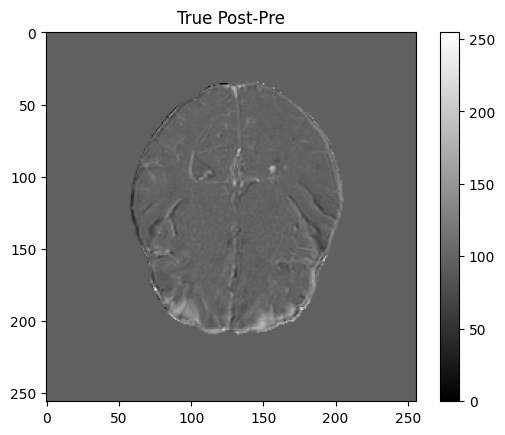

In [ ]:
y2=(dt[4,slice_index,:,:]-dt[3,slice_index,:,:]).reshape((1, m*n)).T
x2=(dt[0:4,slice_index,:,:]).reshape((k-1, m*n)).T

y2=y2-np.min(y2)
y2=255*y2/np.max(y2)
yy=y2.reshape((m,n))
yy.shape
plt.imshow(yy,cmap='gray'), plt.title('True Post-Pre'), plt.colorbar()

In [ ]:
### Sandardization of data ###
# from sklearn.preprocessing import StandardScaler
# PredictorScaler=StandardScaler()
# TargetVarScaler=StandardScaler()
 
# # Storing the fit object for later reference
# PredictorScalerFit=PredictorScaler.fit(X)
# TargetVarScalerFit=TargetVarScaler.fit(y)
 
# # Generating the standardized values of X and y
# X=PredictorScalerFit.transform(X)
# y=TargetVarScalerFit.transform(y)

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

In [ ]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32768, 4)
(32768, 1)
(32768, 4)
(32768, 1)


In [ ]:
import tensorflow as tf 

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
# sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
# model_json_config = model.to_json()
# tf.keras.backend.clear_session() # this is crucial to get previous names again
# del model

# with tf.device("/GPU:0"):
#     model = tf.keras.models.model_from_json(model_json_config)

In [ ]:
# importing the libraries
from keras.models import Sequential
import tensorflow as tf

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=5, input_dim=N_image_types, kernel_initializer='normal', activation='relu'),  # input shape required
  tf.keras.layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
  tf.keras.layers.Dense(1, kernel_initializer='normal')
])

#loss_fn = tf.keras.losses.MeanSquaredError(reduction=losses_utils.ReductionV2.AUTO, name="mean_squared_error")
loss_fn = tf.keras.losses.MeanSquaredError(name="mean_squared_error")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, name="Adam")

In [ ]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_fn(y_true=y, y_pred=y_)

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)
# loss = get_loss(model,loss_fn, X_train[0], y_train[0], training=False)
# print("Loss test: {}".format(loss))

In [ ]:
import warnings
from tqdm import tqdm
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 50

for epoch in range(num_epochs):
  print(f"Epoch: {epoch+1}/{num_epochs}")
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
  # Training loop - using batches of 32
  for x, y in tqdm(train_dataset):
    # Place tensors on the GPU
    with tf.device('/GPU:0'):
      x = tf.constant(x)
      y = tf.constant(y)
      # Optimize the model
      loss_value, grads = grad(model, x, y)
      optimizer.apply_gradients(zip(grads, model.trainable_variables))

      # Track progress
      epoch_loss_avg.update_state(loss_value)  # Add current batch loss
      # Compare predicted label to actual label
      # training=True is needed only if there are layers with different
      # behavior during training versus inference (e.g. Dropout).
      epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  # if epoch % 2 == 0:
  print("\nEpoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch: 1/50


 20%|█▉        | 100/512 [00:01<00:08, 50.30it/s]


KeyboardInterrupt: ignored

In [ ]:
"""
Save Model
"""
model.save(f"/content/MyDrive/MyDrive/BravermanLab/MS_Project/keras_model_{num_epochs}")

In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# create ANN model
model = Sequential()
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=N_image_types, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
tf.debugging.set_log_device_placement(True)
with tf.device('/GPU:0'):
  X_train, y_train = tf.constant(X_train), tf.constant(y_train)
  model.fit(X_train, y_train, batch_size = 20, epochs = 50, verbose=0)
# #model.fit(X_train, y_train ,batch_size = 5, epochs = 50, verbose=0)
# #model.fit(X_train, y_train ,batch_size = 50, epochs = 50, verbose=0)
# #model.fit(X, y ,batch_size = 5, epochs = 50, verbose=0)

In [ ]:
"""
Save Model
"""
model.save("/content/MyDrive/MyDrive/BravermanLab/MS_Project/keras_model_31604")

In [ ]:
Pred_training_frame=model.predict(x2)
# Scaling the predicted Price data back to original price scale
Pred_training_frame=TargetVarScalerFit.inverse_transform(Pred_training_frame)
min_val=np.min(Pred_training_frame)
max_val=np.max(Pred_training_frame-min_val)
print(min_val,max_val)

2048/2048 [==============================] - 3s 2ms/step
-113.46757 340.82294


In [ ]:
# test trained model on slices with tumor from excel file

slices = get_slices(sub_id)
which=0 # to len(slices) # pseudo command
new_frame=slices[which]
Xnew=dt[0:4,new_frame,:,:].reshape((k-1, m*n)).T
Xnew=PredictorScalerFit.transform(Xnew)

# make tartget/label data using post-pre
ynew=(dt[4,new_frame,:,:]-dt[3,new_frame,:,:])
ynew=ynew-np.min(ynew); ynew=255*ynew/np.max(ynew)
#ynew=TargetVarScalerFit.transform(ynew)

print(Xnew.shape,ynew.shape)

Predictions_val=model.predict(Xnew)

# Scaling the predicted Price data back to original price scale
Predictions_all_pixels=TargetVarScalerFit.inverse_transform(Predictions_val)

Predictions_all_pixels.shape

(65536, 4) (256, 256)
2048/2048 [==============================] - 5s 2ms/step


(65536, 1)

In [ ]:
out=Predictions_all_pixels.reshape((m,n))
out=out-min_val; out=255*out/max_val
ynew_normalized=ynew/255;
ynew_mask=ynew_normalized>0.5
out_normalized=out-np.min(out); out_normalized=out_normalized/np.max(out_normalized)
out_mask=out_normalized>0.5

0.4828002414001207

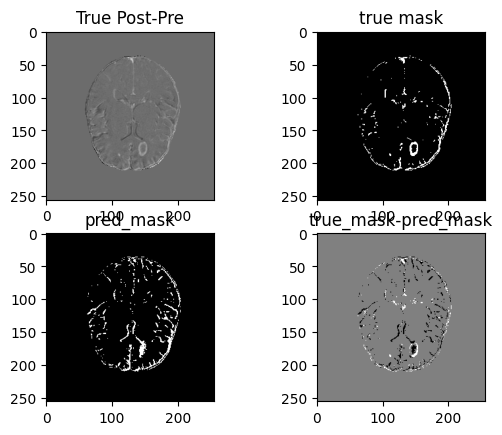

In [ ]:
plt.figure()
plt.subplot(2,2,1)
plt.imshow(ynew,cmap='gray'), plt.title('True Post-Pre')
plt.subplot(2,2,2)
plt.imshow(ynew_mask,cmap='gray'), plt.title('true mask')
plt.subplot(2,2,3)
plt.imshow(out_mask,cmap='gray'), plt.title('pred_mask')
plt.subplot(2,2,4)
plt.imshow((1.0*ynew_mask)-(1.0*out_mask),cmap='gray'), plt.title('true_mask-pred_mask')

#dice_coefficient
smooth = 0
predicted=out_mask; target=ynew_mask
product = predicted*target
intersection = product.sum()
dice = (2*intersection + smooth) / (predicted.sum() + target.sum() + smooth) 
dice

In [ ]:
"""Function for calculating the dice similarity coefficient of FCM predictions"""
def dice_coefficient(predicted, target):
    smooth = 0
    #product = np.matmul(predicted, target)
    product = predicted*target
    intersection = product.sum()
    coef = (2*intersection + smooth) / (predicted.sum() + target.sum() + smooth) 
    return coef



In [ ]:
bins=np.arange(0.4, 0.7, 0.01).tolist()
bins

[0.4,
 0.41000000000000003,
 0.42000000000000004,
 0.43000000000000005,
 0.44000000000000006,
 0.45000000000000007,
 0.4600000000000001,
 0.4700000000000001,
 0.4800000000000001,
 0.4900000000000001,
 0.5000000000000001,
 0.5100000000000001,
 0.5200000000000001,
 0.5300000000000001,
 0.5400000000000001,
 0.5500000000000002,
 0.5600000000000002,
 0.5700000000000002,
 0.5800000000000002,
 0.5900000000000002,
 0.6000000000000002,
 0.6100000000000002,
 0.6200000000000002,
 0.6300000000000002,
 0.6400000000000002,
 0.6500000000000002,
 0.6600000000000003,
 0.6700000000000003,
 0.6800000000000003,
 0.6900000000000003]

In [ ]:
def get_bins(img):
  hist, bin_edges = np.histogram(img, bins=8)
  bx=[]
  bx.append(img<=bin_edges[0])
  for ii in range(1, len(bin_edges)-1):
      temp=np.logical_and(img>bin_edges[ii],img<=bin_edges[ii+1])
      if np.sum(temp)!=0 and np.sum(temp)!=(m*n):
          bx.append(temp)
  bx.append(img>=bin_edges[len(bin_edges)-1])
  return bx

In [ ]:
bins=np.arange(0.4, 0.75, 0.005).tolist()
def get_bins_th(img,bins):  
  bx=[]
  for ii in range(len(bins)):
    bx.append(img>=bins[ii])
  return bx

In [ ]:
ynew_normalized.shape
mx
nx

256

In [ ]:
i=0
mx,nx=gt_bins[i].shape

nz1=100*np.count_nonzero(gt_bins[i])/(mx*nx)
nz1

97.149658203125

In [ ]:
gt_bins=get_bins_th(ynew_normalized,bins)# get_bins(ynew_normalized)
out_bins=get_bins_th(out_normalized,bins)#get_bins(out_normalized)

mx,nx=ynew_normalized.shape
ds = np.zeros((len(gt_bins), len(out_bins)))
for i in range(len(gt_bins)):
  nz1=100*np.count_nonzero(gt_bins[i])/(mx*nx)
  for j in range(len(out_bins)):
    nz2=100*np.count_nonzero(out_bins[i])/(mx*nx)
    if nz1<5 and nz2<5:
      ds[i][j] = dice_coefficient(gt_bins[i], out_bins[j])
    else:
      ds[i][j] =0  

ds_max=np.max(ds)
ds_max
from numpy import unravel_index
loc=unravel_index(ds.argmax(), ds.shape)
loc

NameError: ignored

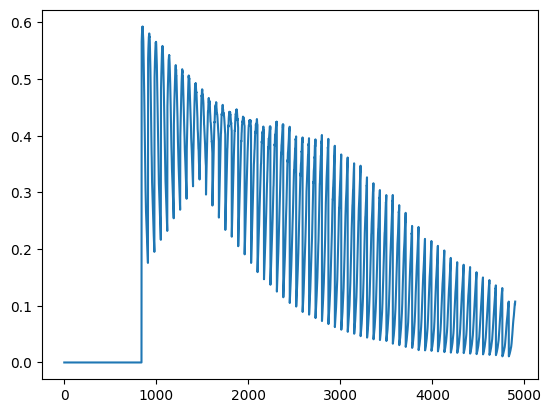

In [ ]:
dsf=ds.flatten()
plt.plot(dsf)

(<matplotlib.image.AxesImage at 0x7fe889f3b8e0>,
 <matplotlib.colorbar.Colorbar at 0x7fe889f119d0>)

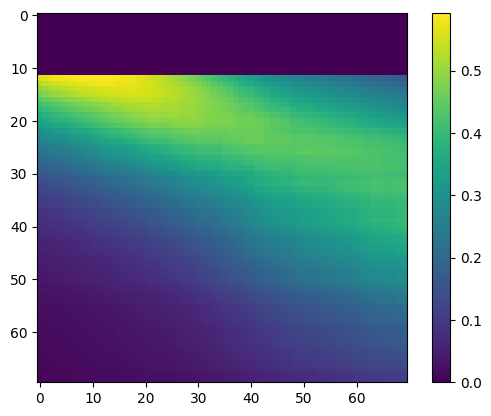

In [ ]:
plt.imshow(ds),plt.colorbar()

In [ ]:
unravel_index

<function numpy.unravel_index>

(0.5927791771620488, Text(0.5, 1.0, 'th=0.45500000000000007'))


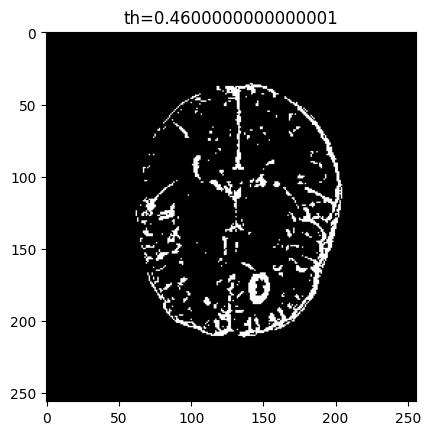

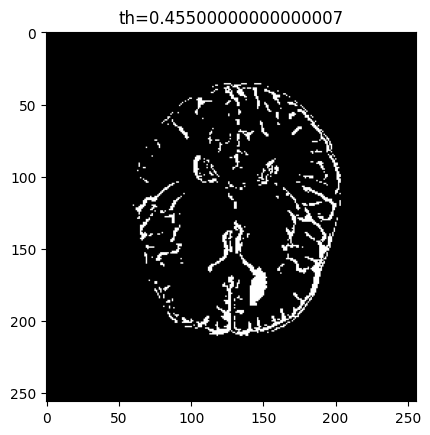

In [ ]:
i=loc[0]
j=loc[1]
plt.imshow(gt_bins[i],cmap='gray'),plt.title('th='+str(bins[i]))
plt.figure()
plt.imshow(out_bins[j],cmap='gray')
dsx=dice_coefficient(gt_bins[i], out_bins[j]),plt.title('th='+str(bins[j]))
print(dsx)

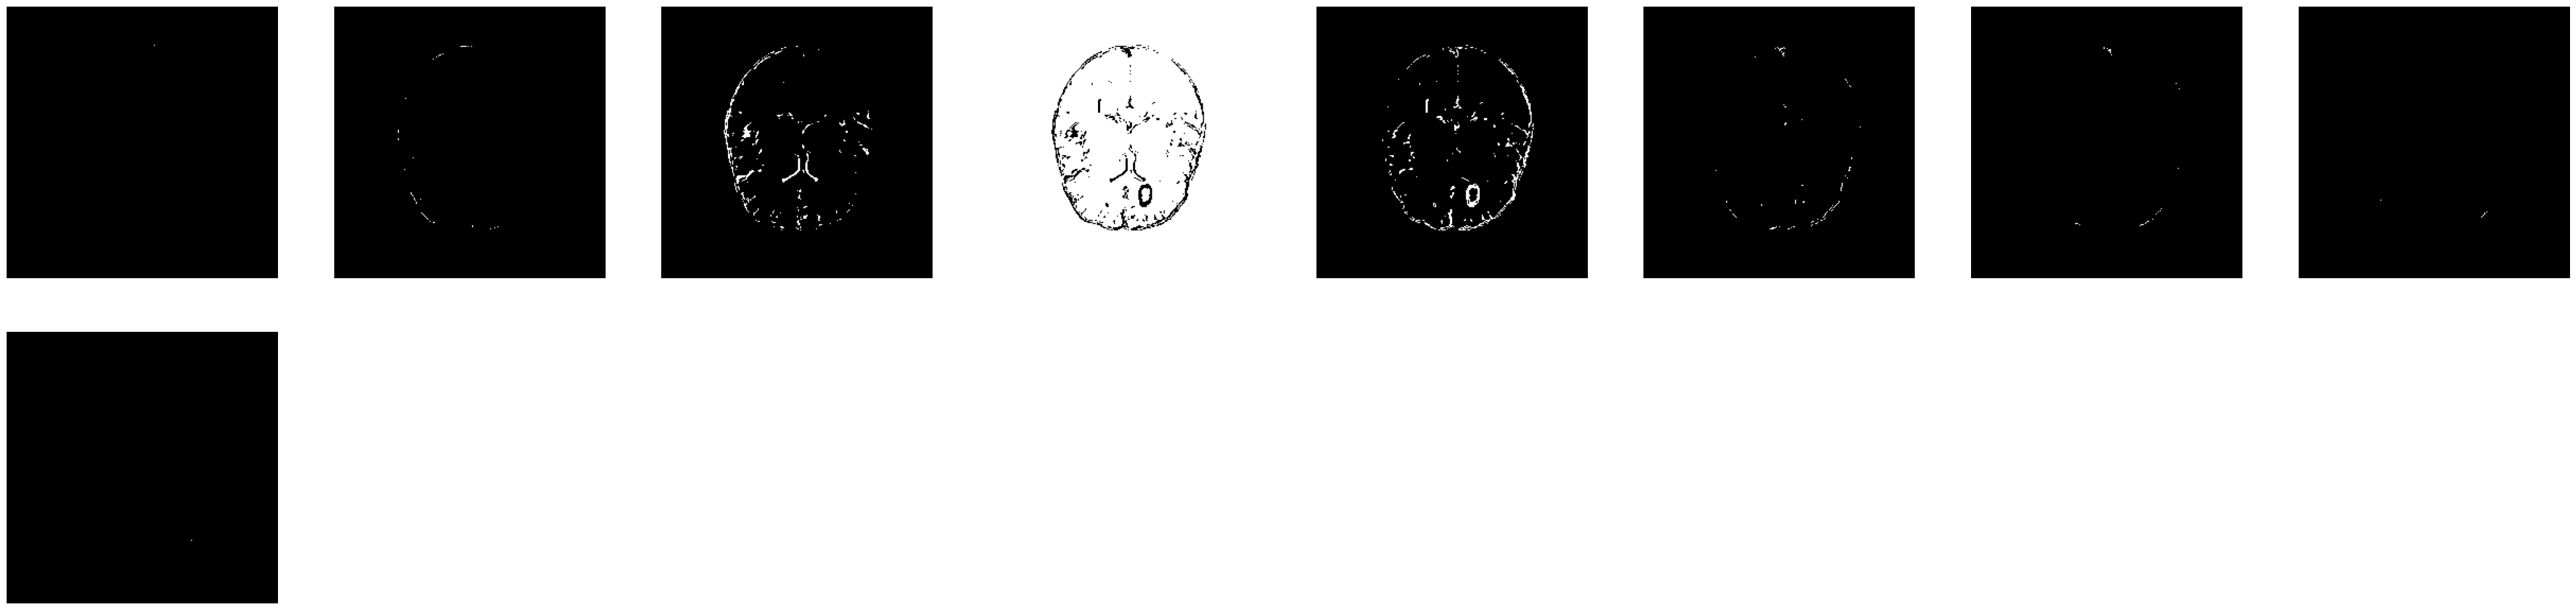

In [ ]:
"""Create Figures 31604"""
fig = plt.figure(figsize=(50, 50))

rows = 8
columns = 8

for idx in range(len(out_bins)):
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, idx+1)
  # showing image
  x = gt_bins[idx]
  plt.imshow(x,cmap='gray')
  plt.axis('off')

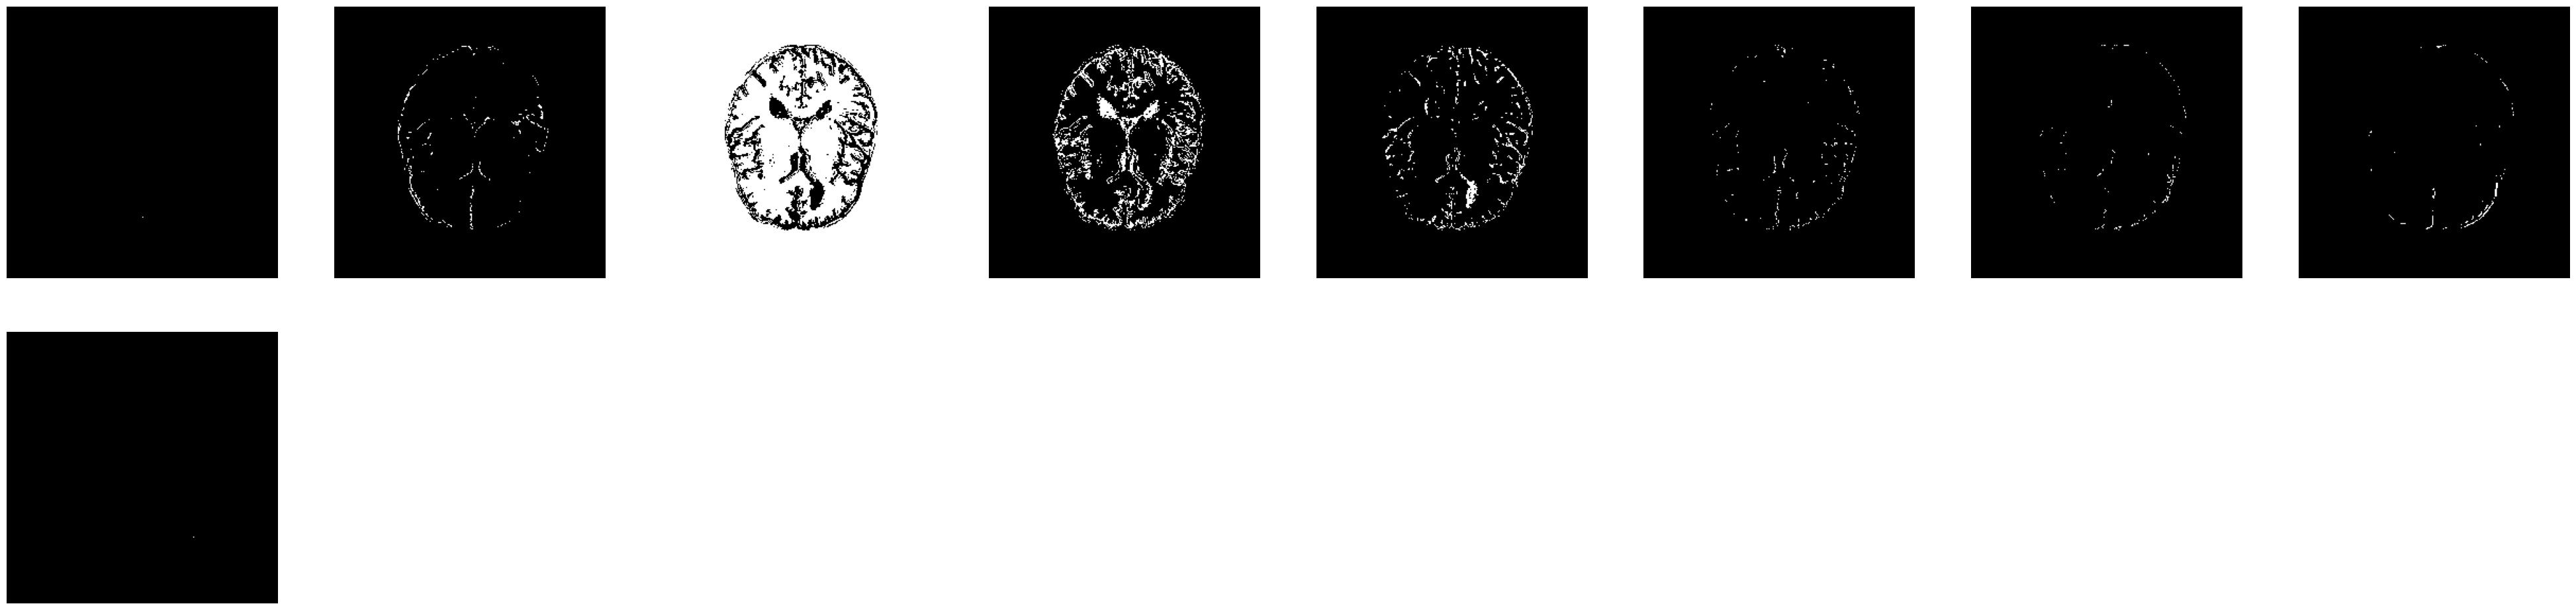

In [ ]:
"""Create Figures 31604"""
fig = plt.figure(figsize=(50, 50))

rows = 8
columns = 8

for idx in range(len(out_bins)):
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, idx+1)
  # showing image
  x = out_bins[idx]
  plt.imshow(x,cmap='gray')
  plt.axis('off')

(<matplotlib.image.AxesImage at 0x7fe80044ee50>,
 Text(0.5, 1.0, 'True Post-Pre'))

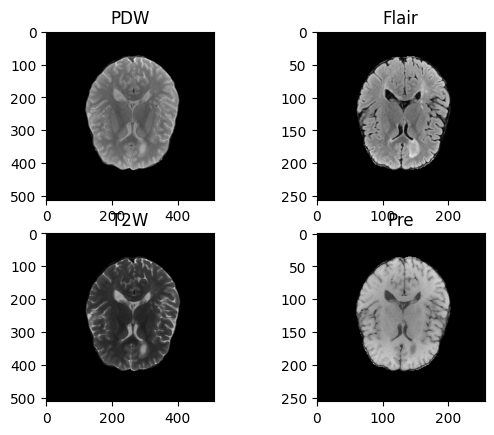

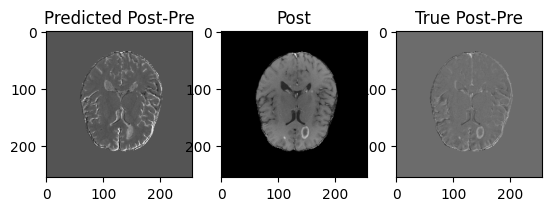

In [ ]:
plt.subplot(2,2,1)
plt.imshow(pdw[new_frame],cmap='gray'), plt.title('PDW')
plt.subplot(2,2,2)
plt.imshow(flair[new_frame],cmap='gray'), plt.title('Flair')
plt.subplot(2,2,3)
plt.imshow(t2w[new_frame],cmap='gray'), plt.title('T2W')
plt.subplot(2,2,4)
plt.imshow(pre[new_frame],cmap='gray'), plt.title('Pre')
plt.figure()
plt.subplot(1,3,1)
#plt.imshow(out,clim=(0, 255),cmap='gray'), plt.title('Predicted Post-Pre')
plt.imshow(out_normalized,cmap='gray'), plt.title('Predicted Post-Pre')
plt.subplot(1,3,2)
plt.imshow(post[new_frame],cmap='gray'), plt.title('Post')
plt.subplot(1,3,3)
plt.imshow(ynew,cmap='gray'), plt.title('True Post-Pre')

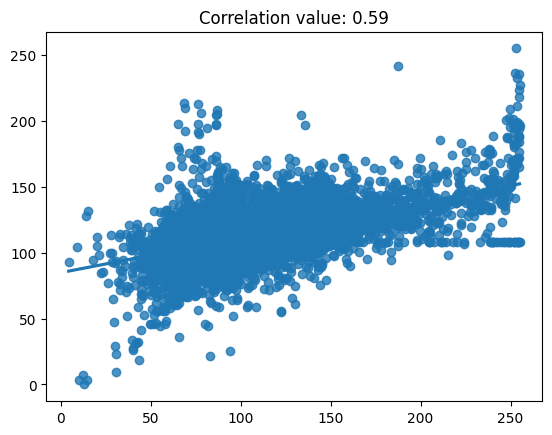

0.5856816098266878

In [ ]:
y_pixels=ynew.reshape((1,m*n)).T
out_pixels=out.reshape((1,m*n)).T
a=y_pixels.T.tolist(); b=out_pixels.T.tolist()

#a=ynew_mask.reshape(m*n,1).T.tolist(); b=out_mask.reshape(m*n,1).T.tolist()
corr_matrix=np.corrcoef(a,b)
corr = corr_matrix[0,1]
import seaborn as sb
#sb.regplot(x = out_pixels, y = y_pixels),plt.title('Correlation value: '+str(np.round(100*corr)/100))
sb.regplot(x = b, y = a),plt.title('Correlation value: '+str(np.round(100*corr)/100))
plt.show() 
corr